# Imports

In [18]:
import pandas as pd
import polars as pl
import pyreadstat
import missingno as msgo

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [20]:
# Why I choosing the level 07 
# As you mention this we need to Understand the user food, health and finance background

In [21]:
lev_07_path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-07\data2\lev_07_mp_clean.parquet"

pdf = pl.read_parquet(lev_07_path)

In [22]:
pdf.null_count()

Free_other_items_received,Total_other_items,Fee_waiver_received,Num_fee_waiver_received,Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount,Online_purchase_fuel_light,Online_purchase_toilet_articles,Online_purchase_education,Online_purchase_medicine,Online_purchase_services,Multiplier,Any_member_attended_school,Num_govt_school_attended,Num_private_school_attended,Free_textbooks_received,Total_textbooks,Free_stationery_received,Total_stationery,Free_school_bag_received,Total_school_bags,Kerosene_ration_card,LPG_subsidy_received,LPG_subsidized_cylinders,Free_electricity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Requirements

In [23]:
lev_07_food = [
    'Free_other_items_received',
    'Total_other_items',
    'Fee_waiver_received',
    'Num_fee_waiver_received',
]

lev_07_health = [
    'Ayushman_beneficiary',
    'Num_ayushman_beneficiaries',
    'Hospitalization_case',
    'Medical_benefit_received',
    'Num_medical_beneficiaries',
    'Medical_benefit_amount',
]

lev_07_digital = [
    'Online_purchase_fuel_light',
    'Online_purchase_toilet_articles',
    'Online_purchase_education',
    'Online_purchase_medicine',
    'Online_purchase_services',
    'Multiplier'
]

lev_07_occupation = [
    'Any_member_attended_school',
    'Num_govt_school_attended',
    'Num_private_school_attended',
    'Free_textbooks_received',
    'Total_textbooks',
    'Free_stationery_received',
    'Total_stationery',
    'Free_school_bag_received',
    'Total_school_bags',
]

lev_07_govt = [
    'Kerosene_ration_card',
    'LPG_subsidy_received',
    'LPG_subsidized_cylinders',
    'Free_electricity',
]

# Functions

In [91]:
def plot_pie (col_name: str, label=True) -> None:
    plt.pie(
        data=pdf[col_name].value_counts(),
        x = pdf[col_name].value_counts()['count'],
        labels=pdf[col_name].value_counts()[col_name],
        autopct='%1.2f%%',
    )

    if label == True:
        plt.title(f'%age of {col_name} \n\n1-Yes, 2-No')
        plt.show()
    else:
        plt.title(f'%age of {col_name}')
        plt.show()

# Health

In [24]:
pdf[lev_07_health]

Ayushman_beneficiary,Num_ayushman_beneficiaries,Hospitalization_case,Medical_benefit_received,Num_medical_beneficiaries,Medical_benefit_amount
i32,i32,i32,i32,i32,i32
2,0,1,2,2,0
1,1,1,1,1,60000
2,0,1,2,2,0
2,0,1,2,2,0
1,1,3,1,1,120000
…,…,…,…,…,…
1,4,4,2,2,0
2,0,4,2,2,0
1,3,1,2,2,0


## %age of Ayshman Beneficiary

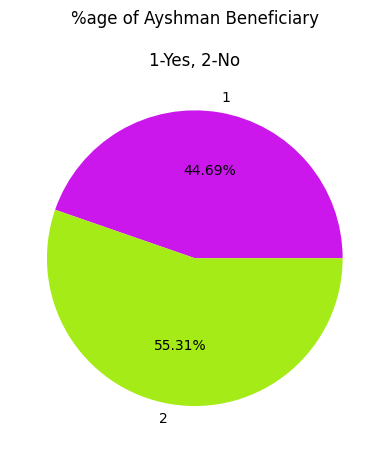

In [25]:
plt.pie(
    data=pdf['Ayushman_beneficiary'].value_counts(),
    x = pdf['Ayushman_beneficiary'].value_counts()['count'],
    labels=pdf['Ayushman_beneficiary'].value_counts()['Ayushman_beneficiary'],
    autopct='%1.2f%%',
)


plt.title('%age of Ayshman Beneficiary\n\n1-Yes, 2-No')
plt.show()

## Family member register in ayushman card

In [26]:
num_ayus_df = pdf['Num_ayushman_beneficiaries'].value_counts().to_pandas()
num_ayus_df = num_ayus_df.sort_values(by='count', ascending=False)
num_ayus_df

,Num_ayushman_beneficiaries,count
12,0,15604
5,2,3980
4,4,2556
9,3,2210
2,1,1526
1,5,1314
7,6,630
0,7,204
8,8,126
3,10,26


## Num of Hospitalization_case

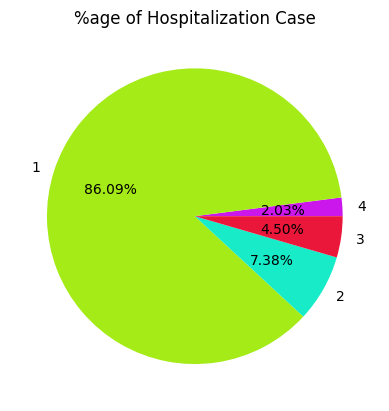

In [27]:
plt.pie(
    data=pdf['Hospitalization_case'].value_counts(),
    x = pdf['Hospitalization_case'].value_counts()['count'],
    labels=pdf['Hospitalization_case'].value_counts()['Hospitalization_case'],
    autopct='%1.2f%%',
)


plt.title('%age of Hospitalization Case')
plt.show()

| No | Title |
| -- | ---- |
| 1 | yes, in Government/Public hospital |
| 2 | yes, in Private (including Charitable/trust run) hospital |
| 3 | yes, in both Government & Private hospital |
| 4 | No |


## How many received the medical benefits

In [28]:
pdf['Medical_benefit_received'].value_counts()

Medical_benefit_received,count
i32,u32
1,428
2,27782


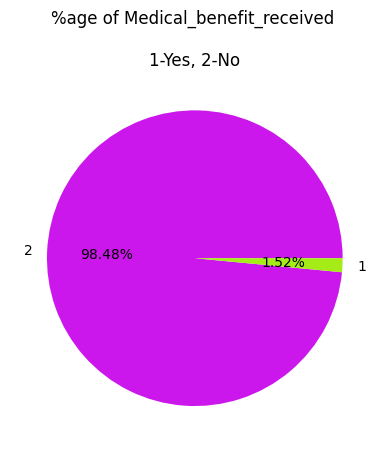

In [29]:
plt.pie(
    data=pdf['Medical_benefit_received'].value_counts(),
    x = pdf['Medical_benefit_received'].value_counts()['count'],
    labels=pdf['Medical_benefit_received'].value_counts()['Medical_benefit_received'],
    autopct='%1.2f%%',
)


plt.title('%age of Medical_benefit_received \n\n1-Yes, 2-No')
plt.show()

## Num Medical Beneficiaries

In [30]:
pdf['Num_medical_beneficiaries'].value_counts()

Num_medical_beneficiaries,count
i32,u32
2,27804
1,406


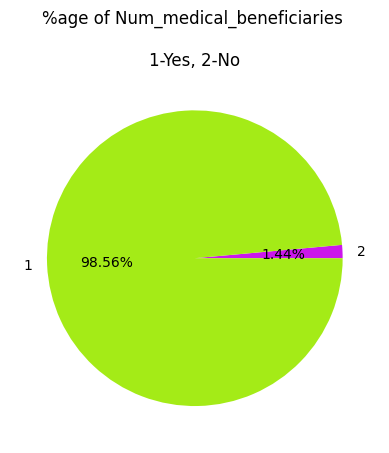

In [31]:
plt.pie(
    data=pdf['Num_medical_beneficiaries'].value_counts(),
    x = pdf['Num_medical_beneficiaries'].value_counts()['count'],
    labels=pdf['Num_medical_beneficiaries'].value_counts()['Num_medical_beneficiaries'],
    autopct='%1.2f%%',
)


plt.title('%age of Num_medical_beneficiaries \n\n1-Yes, 2-No')
plt.show()

## Medical_benefit_amount

In [44]:
frq_medical_amt = pdf['Medical_benefit_amount'].value_counts().to_pandas()
frq_medical_amt

,Medical_benefit_amount,count
0,35500,2
1,700,2
2,0,27796
3,100000,10
4,18000,4
...,...,...
102,3268,2
103,36500,2
104,25500,2
105,30000,28


In [50]:
without_0_frq_medical_amt_df = frq_medical_amt[frq_medical_amt['Medical_benefit_amount'] != 0]

<Axes: xlabel='Medical_benefit_amount', ylabel='Count'>

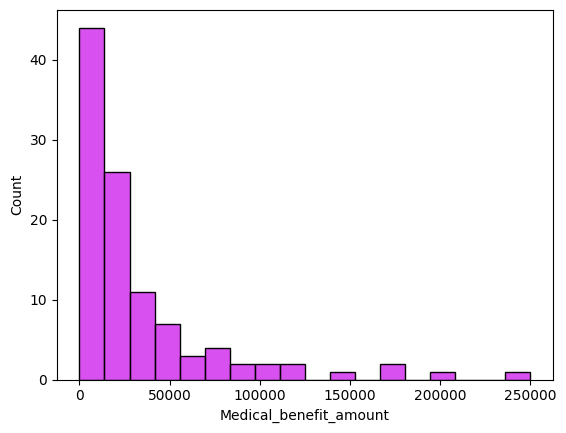

In [51]:
sns.histplot(without_0_frq_medical_amt_df['Medical_benefit_amount'])

In [54]:
without_0_frq_medical_amt_df.describe([0.25, 0.3, 0.4, 0.5, 0.6, 0.7, .8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99 ])

,Medical_benefit_amount,count
count,106.000000,106.000000
mean,33810.896226,3.905660
std,44844.529526,4.261742
min,50.000000,2.000000
25%,6687.500000,2.000000
30%,10100.000000,2.000000
40%,13500.000000,2.000000
50%,17750.000000,2.000000
60%,25000.000000,2.000000
70%,34600.000000,4.000000


<Axes: ylabel='Count'>

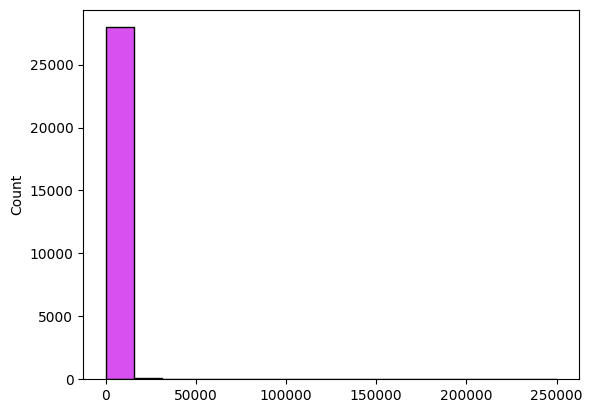

In [33]:
sns.histplot(pdf['Medical_benefit_amount'])

<Axes: ylabel='Density'>

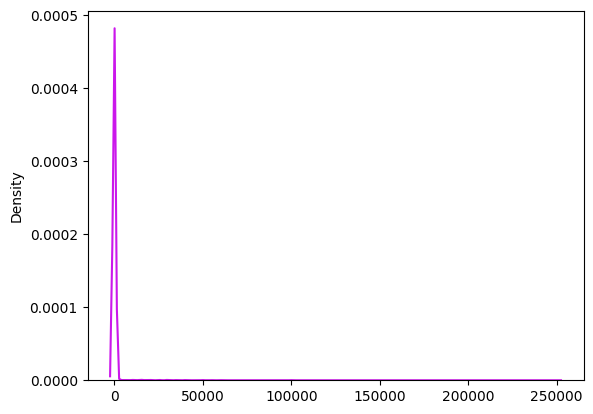

In [35]:
sns.kdeplot(pdf['Medical_benefit_amount'])

In [41]:
pdf[lev_07_health].columns

['Ayushman_beneficiary',
 'Num_ayushman_beneficiaries',
 'Hospitalization_case',
 'Medical_benefit_received',
 'Num_medical_beneficiaries',
 'Medical_benefit_amount']

# Food

In [57]:
pdf['Free_other_items_received'].value_counts()

Free_other_items_received,count
i32,u32
0,27136
1,1074


## Total Other items

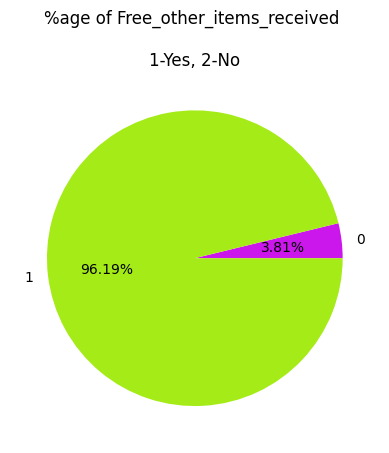

In [59]:
plot_pie('Free_other_items_received')

In [63]:
pdf['Total_other_items'].value_counts().sort(by='Total_other_items').to_pandas()

,Total_other_items,count
0,0,27136
1,1,338
2,2,426
3,3,82
4,4,154
5,5,6
6,6,50
7,7,2
8,8,8
9,10,2


## Fee_waiver_received

In [64]:
pdf['Fee_waiver_received'].value_counts()

Fee_waiver_received,count
i32,u32
2,25646
1,2564


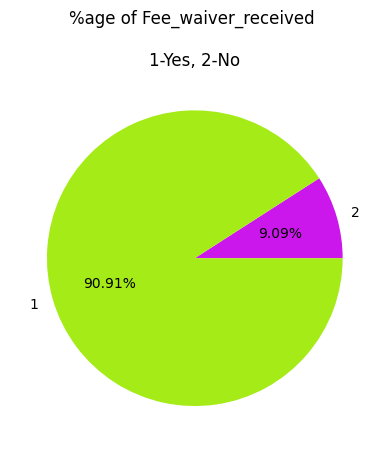

In [65]:
plot_pie('Fee_waiver_received')

## Num_fee_waiver_received

In [66]:
pdf['Num_fee_waiver_received'].value_counts()

Num_fee_waiver_received,count
i32,u32
2,1018
3,306
1,1138
6,4
5,10
0,25646
9,2
4,86


In [56]:
pdf[lev_07_food].columns

['Free_other_items_received',
 'Total_other_items',
 'Fee_waiver_received',
 'Num_fee_waiver_received']

# Digital

In [76]:
digital_list = pdf[lev_07_digital].columns
digital_list

['Online_purchase_fuel_light',
 'Online_purchase_toilet_articles',
 'Online_purchase_education',
 'Online_purchase_medicine',
 'Online_purchase_services',
 'Multiplier']

## Pie

In [81]:
for col in ['Online_purchase_fuel_light','Online_purchase_toilet_articles',
            'Online_purchase_education','Online_purchase_medicine','Online_purchase_services',]:
    display(pdf[col].value_counts())
    print("===================")

Online_purchase_fuel_light,count
i32,u32
0,23672
1,4538


Online_purchase_toilet_articles,count
i32,u32
1,644
0,27566


Online_purchase_education,count
i32,u32
1,316
0,27894


Online_purchase_medicine,count
i32,u32
0,27872
1,338


Online_purchase_services,count
i32,u32
1,9866
0,18344


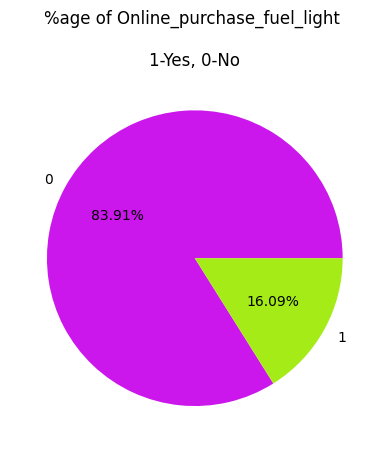

'======================================================================='

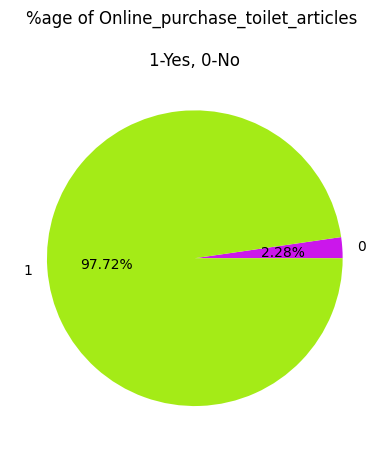

'======================================================================='

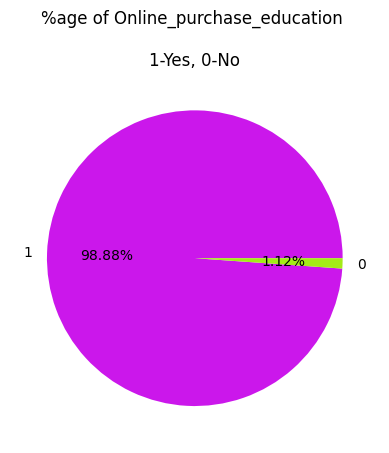

'======================================================================='

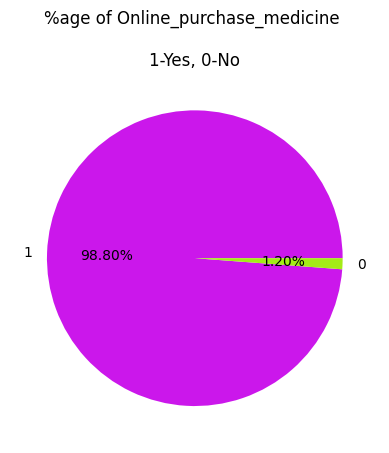

'======================================================================='

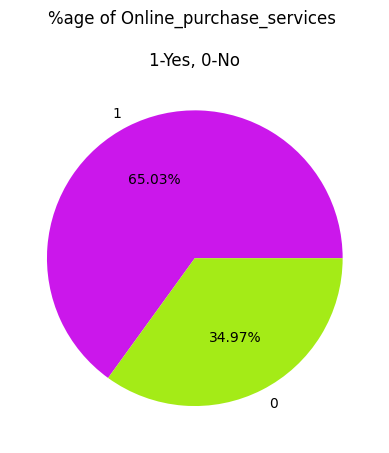

'======================================================================='

In [85]:
for col_name in ['Online_purchase_fuel_light','Online_purchase_toilet_articles',
            'Online_purchase_education','Online_purchase_medicine','Online_purchase_services',]:
    
        plt.pie(
        data=pdf[col_name].value_counts(),
        x = pdf[col_name].value_counts()['count'],
        labels=pdf[col_name].value_counts()[col_name],
        autopct='%1.2f%%',
        )

        plt.title(f'%age of {col_name} \n\n1-Yes, 0-No')
        plt.show()
        
        display("=======================================================================")

# Occupation

## School Students

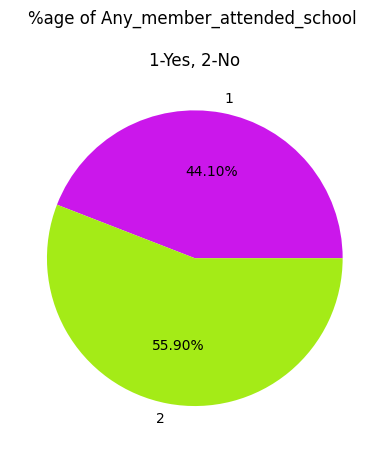

In [89]:
plot_pie('Any_member_attended_school')

## Free_textbooks_received

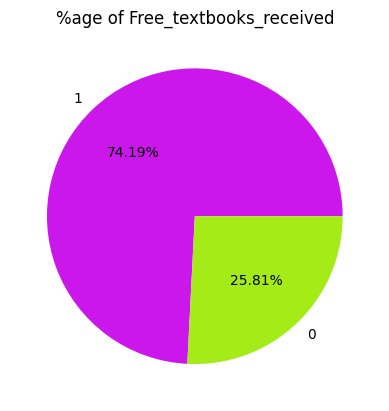

In [92]:
plot_pie('Free_textbooks_received', label=False)

## Others

- Here talking about the number of the household members

In [93]:
for col in pdf[lev_07_occupation].columns:
    display(pdf[col].value_counts())

Any_member_attended_school,count
i32,u32
2,12442
1,15768


Num_govt_school_attended,count
i32,u32
7,8
2,3324
1,3778
6,16
4,286
3,1174
0,19580
5,44


Num_private_school_attended,count
i32,u32
0,19758
4,170
12,2
5,50
3,792
6,12
2,3252
7,6
1,4168


Free_textbooks_received,count
i32,u32
0,20930
1,7280


Total_textbooks,count
i32,u32
28,16
7,220
23,10
36,4
42,2
…,…
0,20930
3,92
14,244


Free_stationery_received,count
i32,u32
0,28112
1,98


Total_stationery,count
i32,u32
6,16
5,4
18,2
8,14
4,12
…,…
7,2
30,2
14,2


Free_school_bag_received,count
i32,u32
0,28146
1,64


Total_school_bags,count
i32,u32
2,20
0,28146
3,10
4,4
1,30


In [86]:
pdf[lev_07_occupation].columns

['Any_member_attended_school',
 'Num_govt_school_attended',
 'Num_private_school_attended',
 'Free_textbooks_received',
 'Total_textbooks',
 'Free_stationery_received',
 'Total_stationery',
 'Free_school_bag_received',
 'Total_school_bags']

# Govt

In [94]:
pdf[lev_07_govt].columns

['Kerosene_ration_card',
 'LPG_subsidy_received',
 'LPG_subsidized_cylinders',
 'Free_electricity']

## Number of subsidized LPG cylinder received during the last 3 months preceding the date of survey (number) (LPG_subsidized_cylinders)

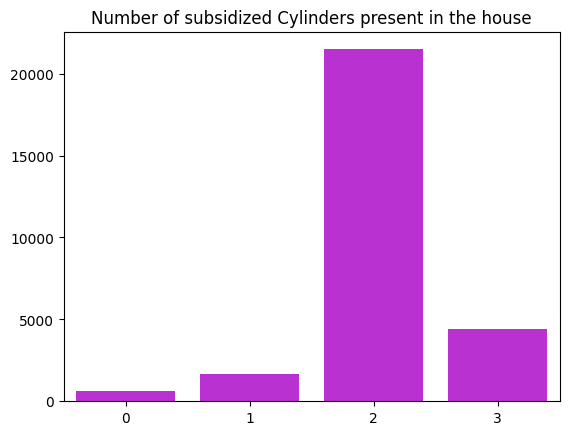

In [98]:
sns.barplot(pdf['LPG_subsidized_cylinders'].value_counts()['count'])
plt.title('Number of subsidized Cylinders present in the house')
plt.show()

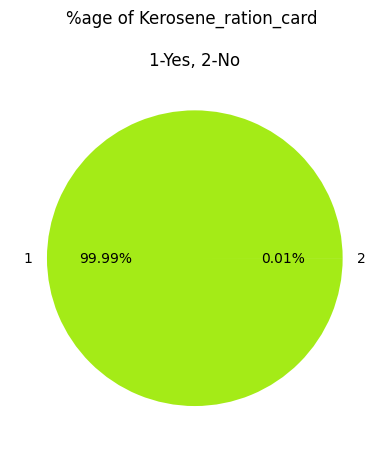

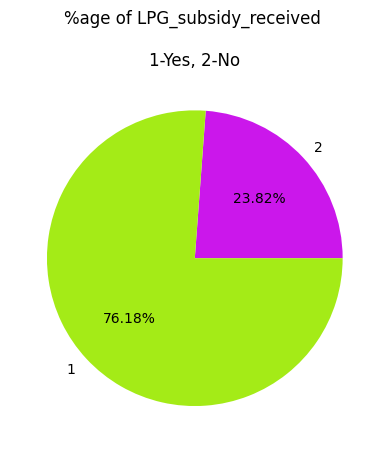

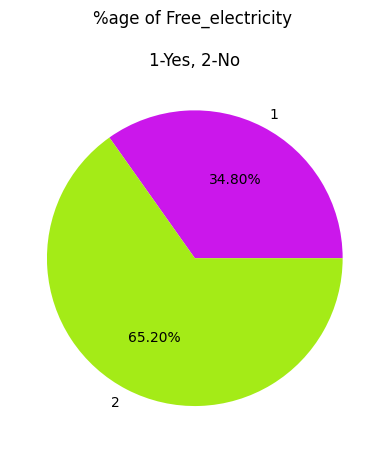

In [100]:
for col in ['Kerosene_ration_card', 'LPG_subsidy_received', 'Free_electricity']:
    plot_pie(col)

In [95]:
for col in pdf[lev_07_govt].columns:
    display(pdf[col].value_counts())

Kerosene_ration_card,count
i32,u32
2,28208
1,2


LPG_subsidy_received,count
i32,u32
2,21490
1,6720


LPG_subsidized_cylinders,count
i32,u32
2,1670
1,4396
0,21490
3,654


Free_electricity,count
i32,u32
2,18392
1,9818


In [ ]:
# done 🙌